In [1]:
from konlpy.tag import Okt #Twitter가 이름이 바뀌었다고 나옴.
okt = Okt()

C:\Users\q\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [7]:
#읽기.
def readLines(fname):
    myfile = open(fname,"tr",encoding="utf-8")
    lines = myfile.read().splitlines()
    myfile.close()    
    return lines

lines = readLines("data\\작통권.txt")

In [8]:
# 어미 조사 구두점을 제외하고 수집.
def collectingWord( okt, lines ):
    exceptWords = (["점순"]) # (고유)명사의 목록.
    result = []
    for l in lines:
        for w in l.split():
            #print(w)
            replaced = False
            for exceptWord in exceptWords:
                if exceptWord in w:
                    w=w.replace(exceptWord,'노무현') #일단 고유명사중 아무거나 사용.
                    replaced = exceptWord
                    break
            
            t = okt.pos( w , norm=True, stem=True) #기본형.        
            #print(t)
            for word, n in t:
                if n not in ["Josa","Emoi","Punctuation"]:
                    if replaced:
                        word = word.replace('노무현',replaced)
                    result.append(word)
    return result

result = collectingWord( okt, lines )

In [4]:
from gensim.models import word2vec

In [9]:
model =  word2vec.Word2Vec([result], size=200, window=10, hs=1, min_count=2, sg=1, iter=10)

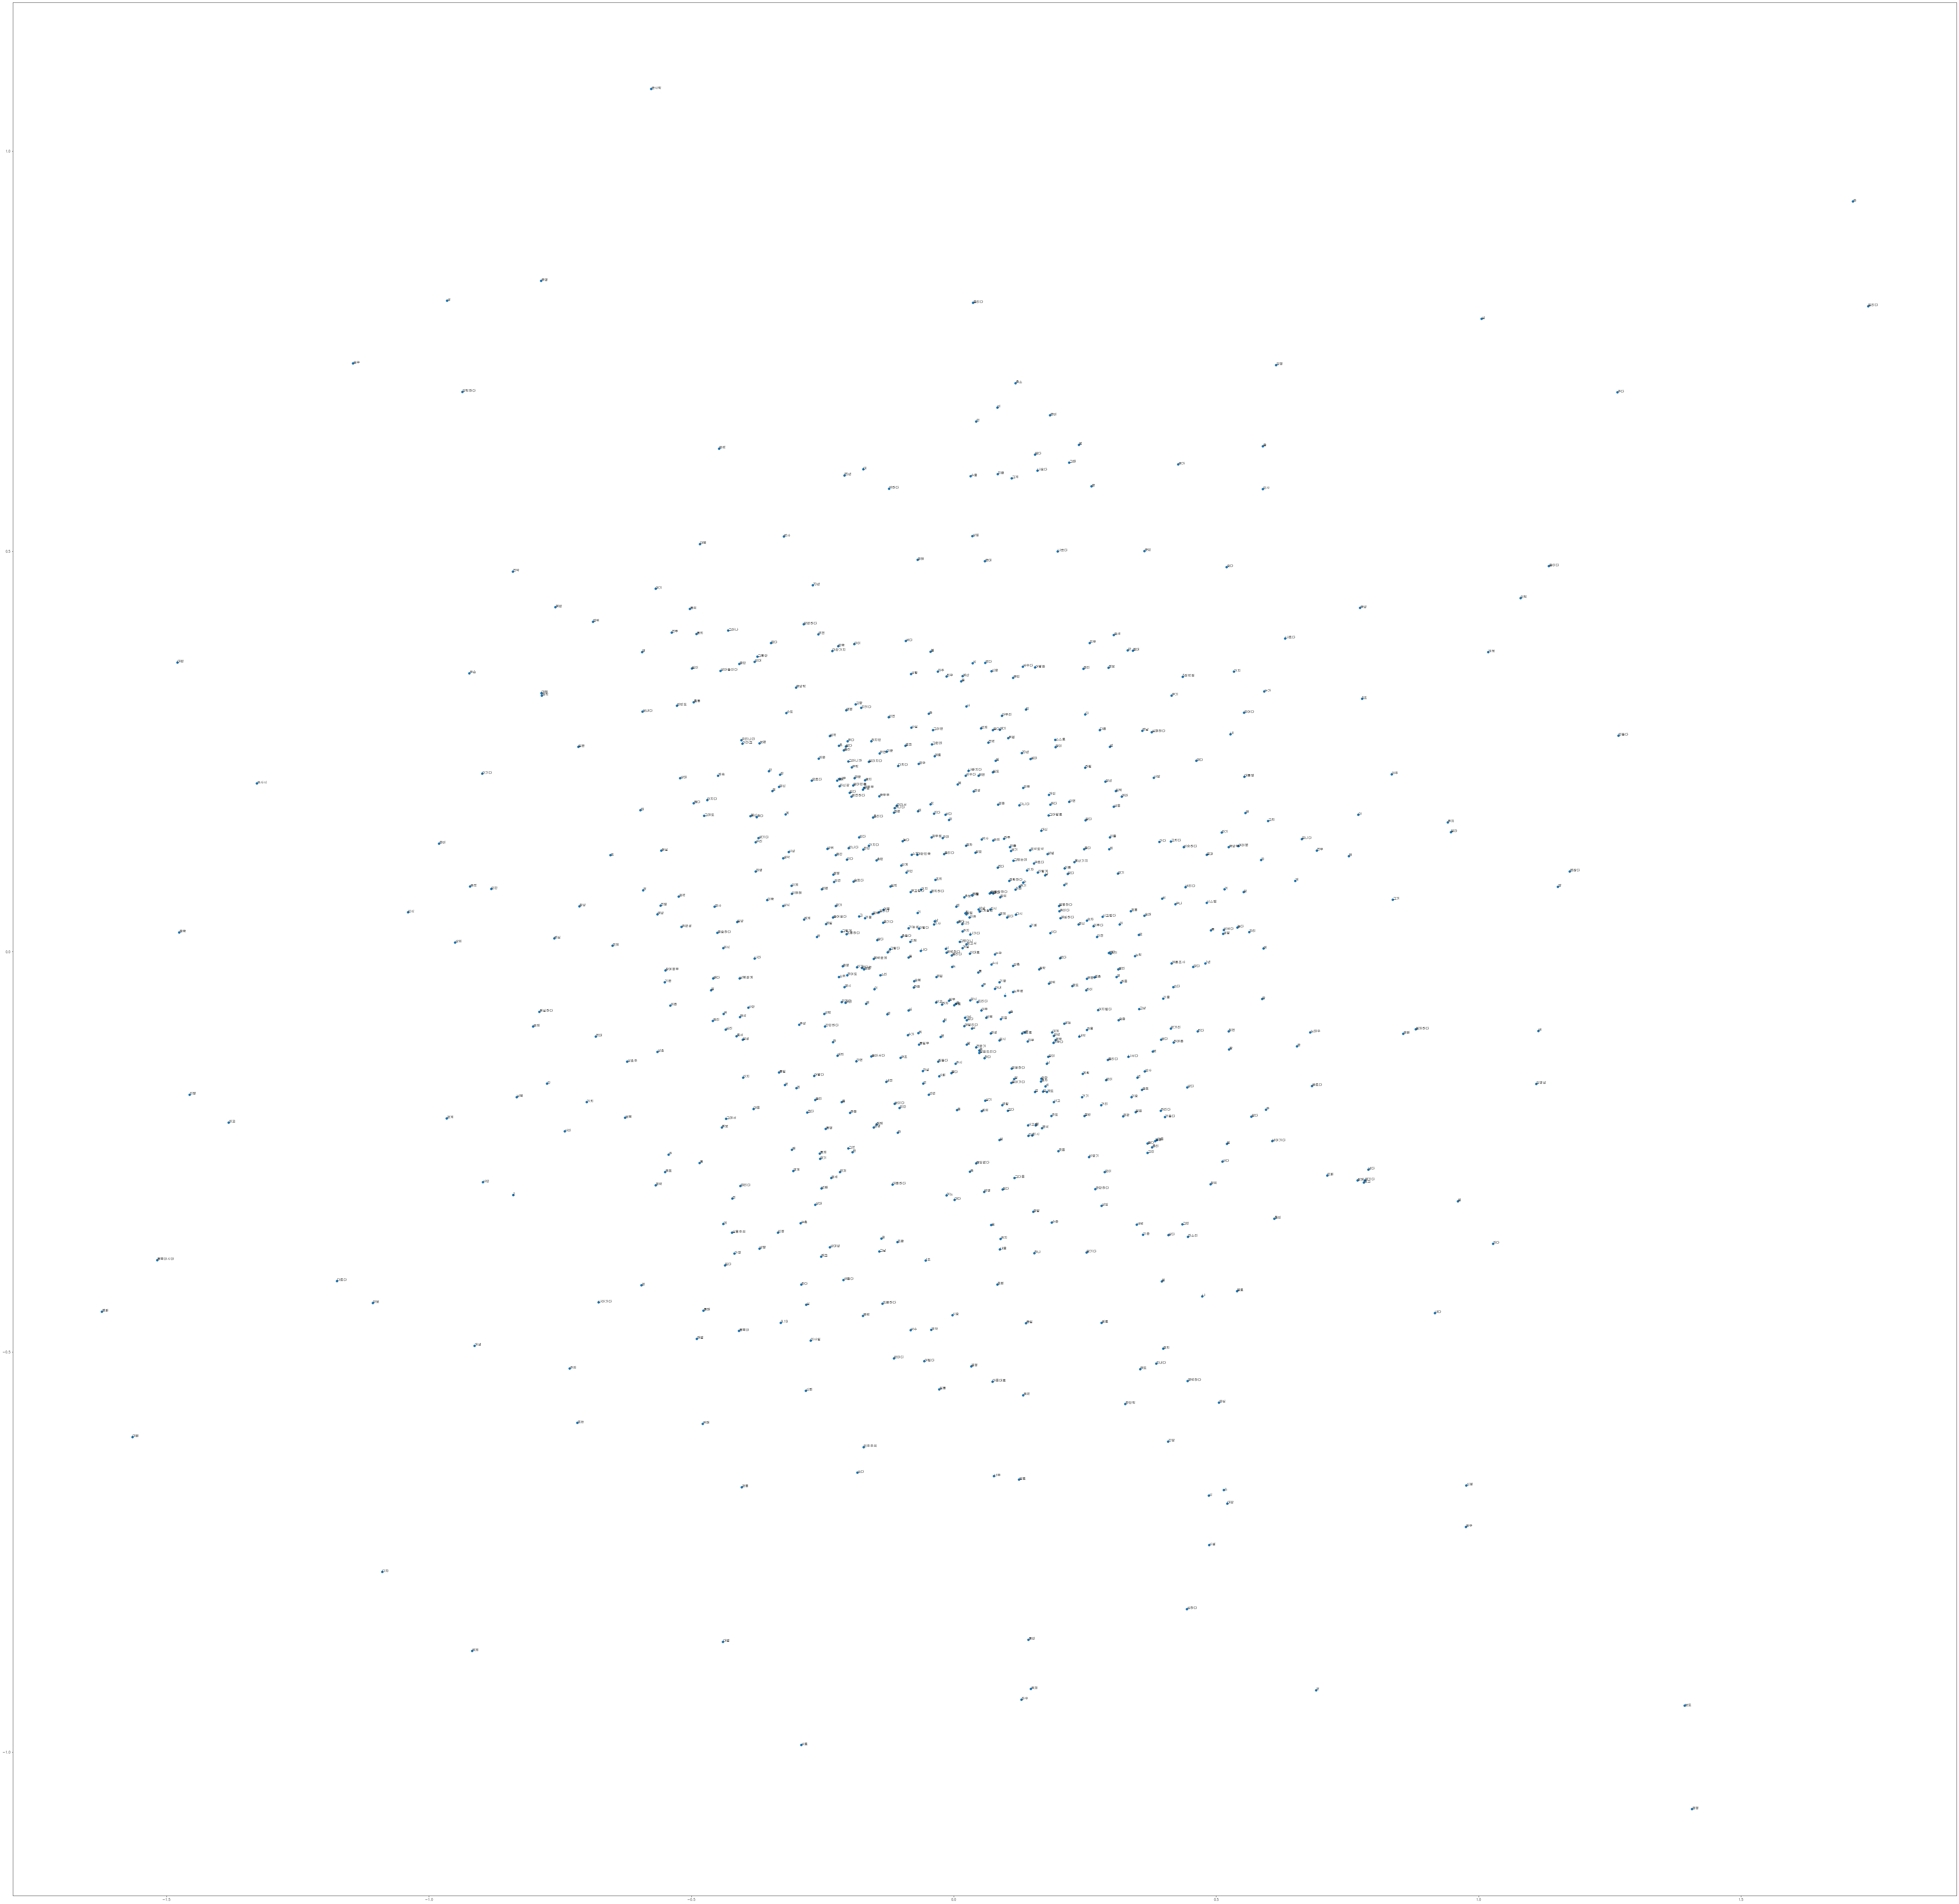

In [10]:
#단어들로 2차원 그래프를 그린다. https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221349385092&proxyReferer=https%3A%2F%2Fwww.google.com%2F
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
wv_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(wv_list)
xs = xys[:,0]
ys = xys[:,1]


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
#그래프에 한글이 나오게 글꼴을 바꾼다. https://programmers.co.kr/learn/courses/21/lessons/950
path = 'C:\\Windows\\Fonts\\gulim.ttc'
fontprop = fm.FontProperties(fname=path, size=18)    
plt.rc('font', family=fontprop.get_name())

def plot_2d_graph(vocabs, xs, ys):
    
    plt.figure(figsize=(100,100))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

plot_2d_graph(vocabs,xs,ys)

In [45]:
model.wv.most_similar(positive=["국방"],negative=[],topn=20)


[('줄', 0.8992171883583069),
 ('개혁', 0.8916038274765015),
 ('무기', 0.8910055160522461),
 ('돼다', 0.8785169124603271),
 ('국방부', 0.8651101589202881),
 ('줄이다', 0.8625801205635071),
 ('인력', 0.8508442044258118),
 ('법', 0.8411861062049866),
 ('먹거리', 0.839028537273407),
 ('노태우', 0.8379083871841431),
 ('짜다', 0.8351619243621826),
 ('비', 0.8331007361412048),
 ('노력', 0.8312242031097412),
 ('시스템', 0.8197795748710632),
 ('아주', 0.818726658821106),
 ('취업', 0.8152390718460083),
 ('많다', 0.8148744702339172),
 ('앞', 0.8146848082542419),
 ('누가', 0.8139201402664185),
 ('자', 0.8100606203079224)]

In [11]:
model.wv.most_similar(positive=["미사일"],negative=[],topn=20)

[('쏘다', 0.9795495271682739),
 ('정말', 0.8616161346435547),
 ('선택', 0.8607839345932007),
 ('계약', 0.847833514213562),
 ('상호주', 0.8422150015830994),
 ('1조', 0.8402114510536194),
 ('정세', 0.8367742300033569),
 ('결정', 0.8340774774551392),
 ('라면', 0.8313695192337036),
 ('데', 0.8312692046165466),
 ('쪽', 0.8286979794502258),
 ('힘들다', 0.8248816132545471),
 ('하나', 0.824076235294342),
 ('마음대로', 0.8240247368812561),
 ('자살', 0.822651207447052),
 ('차다', 0.8212708830833435),
 ('상대방', 0.8209523558616638),
 ('통일부', 0.8191239833831787),
 ('시', 0.8170532584190369),
 ('조금', 0.8146305084228516)]